In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in the data
data = pd.read_csv('.\\train.csv')
result = pd.read_csv('.\\test.csv')

In [3]:
training = data.copy()
testing = result.copy()

In [4]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
training.shape    #(rows,columns)

(891, 12)

In [7]:
testing.shape

(418, 11)

In [8]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
testing.describe()       #data statistics

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
training.isnull().sum()    #find missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
training['Embarked'].fillna(training['Embarked'].mode()[0], inplace = True)   #deal with missing values

In [12]:
training['Age'].fillna(training['Age'].median(), inplace = True)
training['AgeGroup']= pd.cut(training['Age'], bins= [0,12,20,50,100], labels=['Children','Teenagers','Adults','Elderly'])

In [13]:
testing.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
testing['Age'].fillna(testing['Age'].median(), inplace = True)
testing['AgeGroup']= pd.cut(testing['Age'], bins= [0,12,20,50,100], labels=['Children','Teenagers','Adults','Elderly'])

In [15]:
testing['Fare'].fillna(testing['Fare'].mode(), inplace = True)

In [16]:
training['FareClass'] = pd.cut(training['Fare'], 
                            bins=[-1,training['Fare'].quantile(.25),training['Fare'].quantile(.50),training['Fare'].quantile(.75),training['Fare'].max()],
                           labels = ['Cheap','Normal','Expensive','veryExpensive'])

In [17]:
testing['FareClass'] = pd.cut(testing['Fare'], 
                            bins=[-1,testing['Fare'].quantile(.25),testing['Fare'].quantile(.50),testing['Fare'].quantile(.75),testing['Fare'].max()],
                           labels = ['Cheap','Normal','Expensive','veryExpensive'])

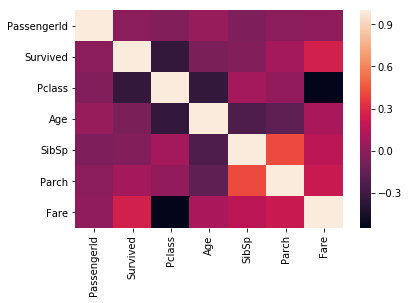

In [18]:
sns.heatmap(training.corr())    #check for linear correlation between features

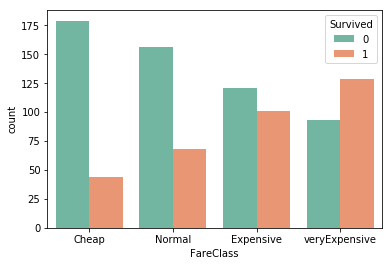

In [19]:
sns.countplot( x='FareClass', hue='Survived', data= training, palette='Set2')

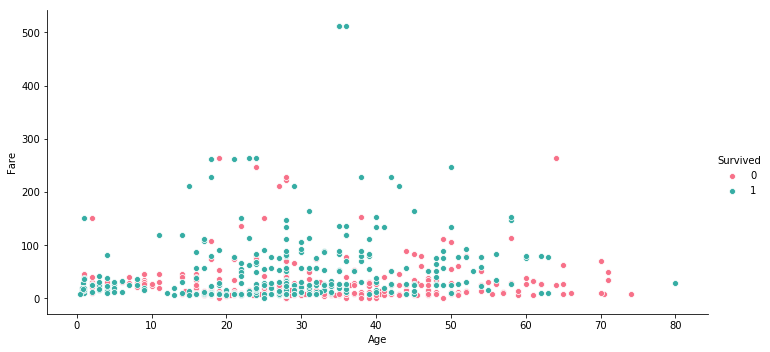

In [20]:
sns.pairplot(data=training, hue='Survived', x_vars='Age', y_vars='Fare', height= 5, aspect=2, palette='husl')

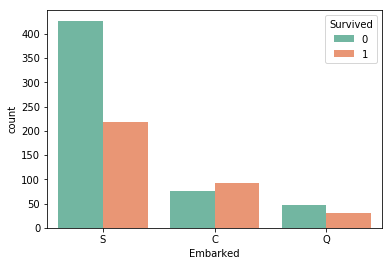

In [21]:
sns.countplot( x='Embarked', hue='Survived', data= training, palette='Set2')

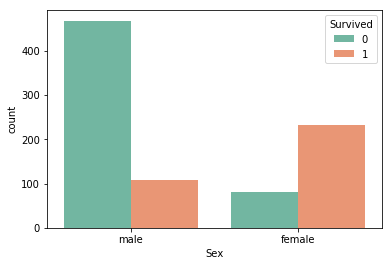

In [22]:
sns.countplot( x='Sex', hue='Survived', data= training, palette='Set2')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


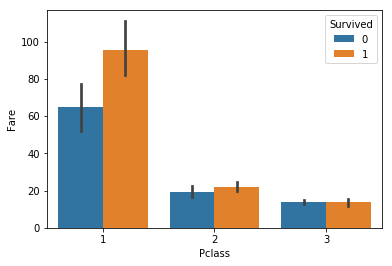

In [23]:
sns.barplot(data=training, hue='Survived', x='Pclass', y='Fare')

In [24]:
training.drop(['PassengerId','Name','Age','Fare','Ticket','Cabin','Parch','SibSp'],axis=1, inplace = True)

In [25]:
testing.drop(['PassengerId','Name','Age','Fare','Ticket','Cabin','Parch','SibSp'],axis=1, inplace = True)

In [26]:
training.head()  #data after dropping columns that would not be used

,Survived,Pclass,Sex,Embarked,AgeGroup,FareClass
0,0,3,male,S,Adults,Cheap
1,1,1,female,C,Adults,veryExpensive
2,1,3,female,S,Adults,Normal
3,1,1,female,S,Adults,veryExpensive
4,0,3,male,S,Adults,Normal


In [27]:
training= pd.get_dummies(training,
                            prefix =['PC','Sex','Em','Age','Fare'], columns=['Pclass','Sex','Embarked','AgeGroup','FareClass'])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train, test = train_test_split(training, test_size = 0.2, random_state = 42)

In [30]:
#import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#import performance metrics
from sklearn.metrics import accuracy_score

In [31]:
#separete target from data
y_train = train['Survived']
x_train = train.drop(['Survived'], axis= 1)

y_test = test['Survived']
x_test = test.drop(['Survived'], axis= 1)


In [32]:
#instantiate mode
knn = KNeighborsClassifier()
log_reg = LogisticRegression()
svc = SVC()
clf = RandomForestClassifier(n_estimators = 500)

In [33]:
#train models
knn.fit(x_train, y_train)
log_reg.fit(x_train, y_train)
svc.fit(x_train, y_train)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
#predict on training data
pred_knn = knn.predict(x_train)
pred_log_reg = log_reg.predict(x_train)
pred_svc = svc.predict(x_train)
pred_clf = clf.predict(x_train)

In [35]:
#get training accuracy
print('knn accuracy: {}'.format(accuracy_score(y_train, pred_knn)))
print('log_reg accuracy: {}'.format(accuracy_score(y_train, pred_log_reg)))
print('svc accuracy: {}'.format(accuracy_score(y_train, pred_svc)))
print('clf accuracy: {}'.format(accuracy_score(y_train, pred_clf)))

knn accuracy: 0.8412921348314607
log_reg accuracy: 0.800561797752809
svc accuracy: 0.8455056179775281
clf accuracy: 0.8595505617977528


In [36]:
#predict on test data
prediction_knn = knn.predict(x_test)
prediction_log_reg = log_reg.predict(x_test)
prediction_svc = svc.predict(x_test)
prediction_clf = clf.predict(x_test)

In [37]:
#get test accuracy
print('knn accuracy: {}'.format(accuracy_score(y_test, prediction_knn)))
print('log_reg accuracy: {}'.format(accuracy_score(y_test, prediction_log_reg)))
print('svc accuracy: {}'.format(accuracy_score(y_test, prediction_svc)))
print('clf accuracy: {}'.format(accuracy_score(y_test, prediction_clf)))

knn accuracy: 0.7877094972067039
log_reg accuracy: 0.7988826815642458
svc accuracy: 0.7988826815642458
clf accuracy: 0.7821229050279329


In [38]:
testing= pd.get_dummies(testing,
                            prefix =['PC','Sex','Em','Age','Fare'], columns=['Pclass','Sex','Embarked','AgeGroup','FareClass'])

In [39]:
y_testing = svc.predict(testing)

In [40]:
submission = pd.concat([result['PassengerId'], pd.DataFrame(y_testing)], axis=1)
submission.columns = ['PassengerId','Survived']

In [41]:
submission.to_csv('final_submission.csv', index=False, encoding = 'utf-8')